# **ETL Y Análisis Exploratorio de Datos (EDA) para la cuenta ProfeKyle**

### Importar las Librerías

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [2]:
df=pd.read_excel("dataset_instagram-post-profeKyle.xlsx")

In [3]:
df.head(10)

,id,caption,timestamp,displayUrl,videoUrl,ownerUsername,locationId,locationName,type,productType,...,hashtags/20,hashtags/21,hashtags/22,hashtags/23,hashtags/24,hashtags/25,hashtags/26,hashtags/27,hashtags/28,hashtags/29
0,3501449477940994097,Un detalle sobre la N de inglés\n\n#pronunciac...,2024-11-14T23:02:54.000Z,https://scontent-lhr8-2.cdninstagram.com/v/t51...,https://scontent-lhr8-1.cdninstagram.com/o1/v/...,profekyle,NaN,NaN,Video,clips,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3505112548416836259,Así es cómo los gringos pronuncian MOUNTAIN \n...,2024-11-20T00:22:31.000Z,https://scontent-iad3-2.cdninstagram.com/v/t51...,https://scontent-iad3-2.cdninstagram.com/o1/v/...,profekyle,NaN,NaN,Video,clips,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3494976201094038293,¿Conoces los mellizos en inglés?\n\n#pronuncia...,2024-11-06T00:41:44.000Z,https://scontent-ord5-3.cdninstagram.com/v/t51...,https://scontent-ord5-3.cdninstagram.com/o1/v/...,profekyle,NaN,NaN,Video,clips,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3495648308672918650,"Si quieres sonar más gringo, baja la mandíbula...",2024-11-06T23:05:01.000Z,https://scontent-atl3-2.cdninstagram.com/v/t51...,https://scontent-atl3-1.cdninstagram.com/o1/v/...,profekyle,NaN,NaN,Video,clips,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3499292577719895601,No digas la O de inglés como la O de inglés\n\...,2024-11-11T23:42:06.000Z,https://scontent-atl3-2.cdninstagram.com/v/t51...,https://scontent-atl3-3.cdninstagram.com/o1/v/...,profekyle,NaN,NaN,Video,clips,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3500153768182762233,No digas la D en inglés como la D de español\...,2024-11-13T04:09:46.000Z,https://scontent-mia3-2.cdninstagram.com/v/t51...,https://scontent-mia3-1.cdninstagram.com/o1/v/...,profekyle,NaN,NaN,Video,clips,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3504367800659795727,¿Sabes pronunciar BUTTON como gringo?\n\n#pron...,2024-11-18T23:41:39.000Z,https://scontent-cdg4-2.cdninstagram.com/v/t51...,https://scontent-cdg4-2.cdninstagram.com/o1/v/...,profekyle,NaN,NaN,Video,clips,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3500767708875029213,No digas la B en inglés como si fuera la B de ...,2024-11-14T00:28:56.000Z,https://instagram.fcgh22-1.fna.fbcdn.net/v/t51...,https://instagram.fcgh22-1.fna.fbcdn.net/o1/v/...,profekyle,NaN,NaN,Video,clips,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3491808729688892393,"QUEDAN 3 DÍAS\n\nPara más información, visita ...",2024-11-01T15:47:39.000Z,https://instagram.fgdl13-1.fna.fbcdn.net/v/t39...,NaN,profekyle,NaN,NaN,Image,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3491389532239308299,¿Sabes pronunciar EDUCATION en inglés gringo?\...,2024-11-01T01:56:27.000Z,https://scontent-lga3-1.cdninstagram.com/v/t51...,https://scontent-lga3-2.cdninstagram.com/o1/v/...,profekyle,NaN,NaN,Video,clips,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['id', 'caption', 'timestamp', 'displayUrl', 'videoUrl', 'ownerUsername',
       'locationId', 'locationName', 'type', 'productType', 'firstComment',
       'likesCount', 'commentsCount', 'videoPlayCount', 'videoViewCount',
       'videoDuration', 'hashtags/0', 'hashtags/1', 'hashtags/2', 'hashtags/3',
       'hashtags/4', 'hashtags/5', 'hashtags/6', 'hashtags/7', 'hashtags/8',
       'hashtags/9', 'hashtags/10', 'hashtags/11', 'hashtags/12',
       'hashtags/13', 'hashtags/14', 'hashtags/15', 'hashtags/16',
       'hashtags/17', 'hashtags/18', 'hashtags/19', 'hashtags/20',
       'hashtags/21', 'hashtags/22', 'hashtags/23', 'hashtags/24',
       'hashtags/25', 'hashtags/26', 'hashtags/27', 'hashtags/28',
       'hashtags/29'],
      dtype='object')

In [5]:
df.iloc[:, 0:17].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844 entries, 0 to 1843
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1844 non-null   int64  
 1   caption         1844 non-null   object 
 2   timestamp       1844 non-null   object 
 3   displayUrl      1844 non-null   object 
 4   videoUrl        1306 non-null   object 
 5   ownerUsername   1844 non-null   object 
 6   locationId      651 non-null    float64
 7   locationName    651 non-null    object 
 8   type            1844 non-null   object 
 9   productType     1306 non-null   object 
 10  firstComment    1670 non-null   object 
 11  likesCount      1844 non-null   int64  
 12  commentsCount   1844 non-null   int64  
 13  videoPlayCount  524 non-null    float64
 14  videoViewCount  1306 non-null   float64
 15  videoDuration   1306 non-null   float64
 16  hashtags/0      666 non-null    object 
dtypes: float64(4), int64(3), object(1

In [6]:
df.iloc[:, 17:35].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844 entries, 0 to 1843
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   hashtags/1   658 non-null    object
 1   hashtags/2   649 non-null    object
 2   hashtags/3   574 non-null    object
 3   hashtags/4   495 non-null    object
 4   hashtags/5   157 non-null    object
 5   hashtags/6   132 non-null    object
 6   hashtags/7   107 non-null    object
 7   hashtags/8   101 non-null    object
 8   hashtags/9   97 non-null     object
 9   hashtags/10  96 non-null     object
 10  hashtags/11  94 non-null     object
 11  hashtags/12  92 non-null     object
 12  hashtags/13  92 non-null     object
 13  hashtags/14  92 non-null     object
 14  hashtags/15  83 non-null     object
 15  hashtags/16  83 non-null     object
 16  hashtags/17  83 non-null     object
 17  hashtags/18  83 non-null     object
dtypes: object(18)
memory usage: 259.4+ KB


In [7]:
df.iloc[:, 35:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844 entries, 0 to 1843
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   hashtags/19  80 non-null     object
 1   hashtags/20  80 non-null     object
 2   hashtags/21  76 non-null     object
 3   hashtags/22  76 non-null     object
 4   hashtags/23  76 non-null     object
 5   hashtags/24  76 non-null     object
 6   hashtags/25  74 non-null     object
 7   hashtags/26  74 non-null     object
 8   hashtags/27  72 non-null     object
 9   hashtags/28  67 non-null     object
 10  hashtags/29  54 non-null     object
dtypes: object(11)
memory usage: 158.6+ KB


In [8]:
df["timestamp"]

0       2024-11-14T23:02:54.000Z
1       2024-11-20T00:22:31.000Z
2       2024-11-06T00:41:44.000Z
3       2024-11-06T23:05:01.000Z
4       2024-11-11T23:42:06.000Z
                  ...           
1839    2017-01-15T04:30:33.000Z
1840    2017-01-13T06:44:27.000Z
1841    2017-01-17T05:07:30.000Z
1842    2017-01-16T06:40:16.000Z
1843    2017-01-11T05:58:36.000Z
Name: timestamp, Length: 1844, dtype: object

In [9]:
df["timestamp"]=df["timestamp"].str.replace("[T]", " ", regex=True)
df["timestamp"]=df["timestamp"].str.replace(".0{3}Z", "", regex=True)

In [10]:
df["timestamp"]=pd.to_datetime(df["timestamp"],  format='%Y-%m-%d %H:%M:%S')

In [11]:
hashtag=[int(df[i].count()) for i in [i for i in df.columns if i.startswith("has")]]

In [12]:
df.drop(["displayUrl",  "videoUrl", "locationId", "hashtags/29"], axis=1, inplace=True)

In [13]:
df.iloc[:, 0:22].info()
len(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844 entries, 0 to 1843
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              1844 non-null   int64         
 1   caption         1844 non-null   object        
 2   timestamp       1844 non-null   datetime64[ns]
 3   ownerUsername   1844 non-null   object        
 4   locationName    651 non-null    object        
 5   type            1844 non-null   object        
 6   productType     1306 non-null   object        
 7   firstComment    1670 non-null   object        
 8   likesCount      1844 non-null   int64         
 9   commentsCount   1844 non-null   int64         
 10  videoPlayCount  524 non-null    float64       
 11  videoViewCount  1306 non-null   float64       
 12  videoDuration   1306 non-null   float64       
 13  hashtags/0      666 non-null    object        
 14  hashtags/1      658 non-null    object        
 15  hash

1844

In [14]:
df["caption"]=df["caption"].str.strip()

In [15]:
df["firstComment"]=df["firstComment"].str.strip()

In [16]:
df["locationName"].value_counts()

locationName
Bogotá, Colombia                    124
Buenos Aires, Argentina              69
Mexico City, Mexico                  33
Buenos Aires                         12
Panama City, Panama                  12
                                   ... 
Guanajuato City                       1
Sincelejo, Sucre                      1
Rio de Janeiro, Rio de Janeiro        1
São Paulo, Brazil                     1
Punta Cana, Republica Dominicana      1
Name: count, Length: 255, dtype: int64

In [17]:
df["ownerUsername"].value_counts()

ownerUsername
profekyle               1843
funanddynamicenglish       1
Name: count, dtype: int64

In [18]:
df.drop(df[df["ownerUsername"].isnull()].index, axis=0, inplace=True)
df["ownerUsername"].isnull().sum()

np.int64(0)

In [19]:
df["locationName"]=df["locationName"].str.strip()

In [20]:
indices=df[df["locationName"].isnull()].index
df.loc[indices, "locationName"]="0"

In [21]:
df["type"]=df["type"].str.strip()
bool(df["type"].value_counts().sum()==len(df["type"]))

True

In [22]:
print(f"cantidad de no nulos {df['productType'].value_counts().sum()}")
print(f"cantidad de nulos {df['productType'].isnull().sum()}")
df["productType"].value_counts()

cantidad de no nulos 1306
cantidad de nulos 538


productType
feed     773
clips    524
igtv       9
Name: count, dtype: int64

In [23]:
df["productType"]=df["productType"].str.strip()
df.loc[:, "productType"]

0       clips
1       clips
2       clips
3       clips
4       clips
        ...  
1839     feed
1840     feed
1841     feed
1842     feed
1843     feed
Name: productType, Length: 1844, dtype: object

In [24]:
indices=df[df.loc[:, "productType"].isnull()].index
df.loc[indices, "productType"] = "0"

In [25]:
bool(df["likesCount"].value_counts().sum()==len(df["likesCount"]))

True

In [26]:
bool(df["commentsCount"].value_counts().sum()==len(df["commentsCount"]))

True

In [27]:
bool(df["commentsCount"].value_counts().sum()==len(df["commentsCount"]))

True

In [31]:
df.iloc[:,9:]

,commentsCount,videoPlayCount,videoViewCount,videoDuration,hashtags/0,hashtags/1,hashtags/2,hashtags/3,hashtags/4,hashtags/5,...,hashtags/19,hashtags/20,hashtags/21,hashtags/22,hashtags/23,hashtags/24,hashtags/25,hashtags/26,hashtags/27,hashtags/28
0,12,3924,1292,63.089,pronunciacion,inglesamericano,aprenderingles,profekyle,-,-,...,-,-,-,-,-,-,-,-,-,-
1,21,4790,2067,71.285,pronunciacion,inglesamericano,aprenderingles,profekyle,-,-,...,-,-,-,-,-,-,-,-,-,-
2,27,6854,2561,72.609,pronunciacion,inglesamericano,aprenderingles,profekyle,-,-,...,-,-,-,-,-,-,-,-,-,-
3,28,7093,2326,80.016,pronunciacion,aprendeingles,inglesamericano,profekyle,-,-,...,-,-,-,-,-,-,-,-,-,-
4,67,7726,2566,55.078,pronunciacion,inglesamericano,aprenderingles,profekyle,-,-,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839,8,0,2,59.626,panamá,guadalajara,tapatio,chilango,monterrey,barranquilla,...,mexico,colombia,venezuela,peru,argentina,ecuador,-,-,-,-
1840,8,0,1,60.060,mexico,monterrey,chilango,guadalajara,tapatio,colombia,...,canada,gringo,hombreguapo,pelirrojo,aprendeingles,aprenderingles,learnenglish,bilingual,aprendeidiomas,-
1841,5,0,3,60.060,bogotá,caracas,barranquilla,lima,medellín,guadalajara,...,-,-,-,-,-,-,-,-,-,-
1842,18,0,2,58.692,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [29]:
df.fillna({"videoPlayCount":0}, inplace=True)
df.fillna({"videoViewCount":0}, inplace=True)
df.fillna({"videoDuration":0}, inplace=True)
df[["likesCount", "commentsCount", "videoPlayCount", "videoViewCount"]]=df[["likesCount", "commentsCount", "videoPlayCount", "videoViewCount"]].astype({"likesCount":"int64", "commentsCount":"int64", "videoPlayCount":"int64", "videoViewCount":"int64"})

In [30]:
lista=[i for i in df.columns if i.startswith("has")]
lista
for i in lista:
    df.fillna({i:"-"}, inplace=True)

In [32]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)

In [33]:
df.iloc[:,0:10].head(10)

,id,caption,timestamp,ownerUsername,locationName,type,productType,firstComment,likesCount,commentsCount
0,3501449477940994097,Un detalle sobre la N de inglés\n\n#pronunciac...,2024-11-14 23:02:54,profekyle,0,Video,clips,Genius !!,288,12
1,3505112548416836259,Así es cómo los gringos pronuncian MOUNTAIN \n...,2024-11-20 00:22:31,profekyle,0,Video,clips,NaN,296,21
2,3494976201094038293,¿Conoces los mellizos en inglés?\n\n#pronuncia...,2024-11-06 00:41:44,profekyle,0,Video,clips,Si,249,27
3,3495648308672918650,"Si quieres sonar más gringo, baja la mandíbula...",2024-11-06 23:05:01,profekyle,0,Video,clips,Puedes explicar los tipos de A con ejemplos pa...,378,28
4,3499292577719895601,No digas la O de inglés como la O de inglés\n\...,2024-11-11 23:42:06,profekyle,0,Video,clips,Gracias a ti profe ….estoy notando la diferen...,546,67
5,3500153768182762233,No digas la D en inglés como la D de español\n...,2024-11-13 04:09:46,profekyle,0,Video,clips,En vez de decir SABER DICES SEBER....JAKA TE C...,1121,132
6,3504367800659795727,¿Sabes pronunciar BUTTON como gringo?\n\n#pron...,2024-11-18 23:41:39,profekyle,0,Video,clips,It easy,449,18
7,3500767708875029213,No digas la B en inglés como si fuera la B de ...,2024-11-14 00:28:56,profekyle,0,Video,clips,"Gracias, muy buena la explicación!",342,22
8,3491808729688892393,"QUEDAN 3 DÍAS\n\nPara más información, visita ...",2024-11-01 15:47:39,profekyle,0,Image,0,Hola que valor tienen las clases individuales,19,11
9,3491389532239308299,¿Sabes pronunciar EDUCATION en inglés gringo?\...,2024-11-01 01:56:27,profekyle,0,Video,clips,"Easy teacher,. Yo la pronunciaba a lo español:...",265,9


In [34]:
df.iloc[:,10:25].head(10)

,videoPlayCount,videoViewCount,videoDuration,hashtags/0,hashtags/1,hashtags/2,hashtags/3,hashtags/4,hashtags/5,hashtags/6,hashtags/7,hashtags/8,hashtags/9,hashtags/10,hashtags/11
0,3924,1292,63.089,pronunciacion,inglesamericano,aprenderingles,profekyle,-,-,-,-,-,-,-,-
1,4790,2067,71.285,pronunciacion,inglesamericano,aprenderingles,profekyle,-,-,-,-,-,-,-,-
2,6854,2561,72.609,pronunciacion,inglesamericano,aprenderingles,profekyle,-,-,-,-,-,-,-,-
3,7093,2326,80.016,pronunciacion,aprendeingles,inglesamericano,profekyle,-,-,-,-,-,-,-,-
4,7726,2566,55.078,pronunciacion,inglesamericano,aprenderingles,profekyle,-,-,-,-,-,-,-,-
5,12487,4660,58.862,pronunciacion,inglesamericano,aprendeingles,profekyle,-,-,-,-,-,-,-,-
6,8164,3431,80.968,pronunciacion,inglesamericano,aprendeingles,profekyle,-,-,-,-,-,-,-,-
7,4839,1730,56.493,pronunciacion,inglesamericano,aprenderingles,profekyle,-,-,-,-,-,-,-,-
8,0,0,0.000,-,-,-,-,-,-,-,-,-,-,-,-
9,7723,2121,61.370,pronunciacion,inglesamericano,aprenderingles,profekyle,-,-,-,-,-,-,-,-


In [35]:
df.iloc[:,25:-1].head(10)

,hashtags/12,hashtags/13,hashtags/14,hashtags/15,hashtags/16,hashtags/17,hashtags/18,hashtags/19,hashtags/20,hashtags/21,hashtags/22,hashtags/23,hashtags/24,hashtags/25,hashtags/26,hashtags/27
0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
3,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
4,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
5,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
6,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
7,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
8,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
9,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-


In [36]:
df = df.iloc[:,0:13]
df.head(3)

,id,caption,timestamp,ownerUsername,locationName,type,productType,firstComment,likesCount,commentsCount,videoPlayCount,videoViewCount,videoDuration
0,3501449477940994097,Un detalle sobre la N de inglés\n\n#pronunciac...,2024-11-14 23:02:54,profekyle,0,Video,clips,Genius !!,288,12,3924,1292,63.089
1,3505112548416836259,Así es cómo los gringos pronuncian MOUNTAIN \n...,2024-11-20 00:22:31,profekyle,0,Video,clips,NaN,296,21,4790,2067,71.285
2,3494976201094038293,¿Conoces los mellizos en inglés?\n\n#pronuncia...,2024-11-06 00:41:44,profekyle,0,Video,clips,Si,249,27,6854,2561,72.609


In [37]:
df_emotions = df
df_emotions = df_emotions.drop(['ownerUsername','locationName'], axis=1)

In [48]:
df_emotions['caption'] = df_emotions['caption'].str.strip()
word_length = df_emotions['caption'].apply(lambda comment: len(comment.split()))
word_length

0       11
1       11
2        9
3       13
4       15
        ..
1839    62
1840    66
1841    11
1842    75
1843    28
Name: caption, Length: 1844, dtype: int64

In [49]:
df_emotions.columns

Index(['id', 'caption', 'timestamp', 'type', 'productType', 'firstComment',
       'likesCount', 'commentsCount', 'videoPlayCount', 'videoViewCount',
       'videoDuration', 'tokens', 'Sentiment_Score'],
      dtype='object')

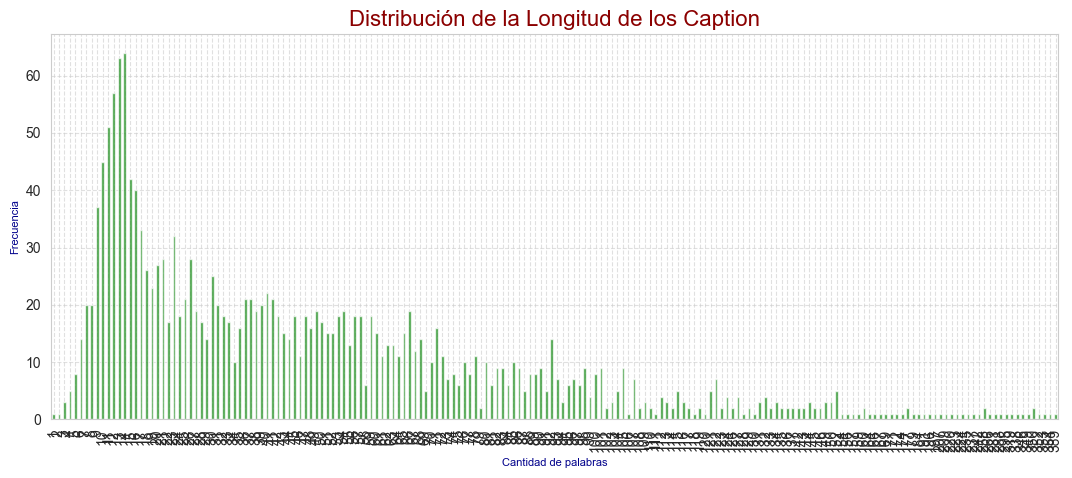

In [52]:
word_length = df_emotions['caption'].apply(lambda comment: len(comment.split()))
lenth_summary = word_length.value_counts().sort_index()
lenth_summary.plot(kind = 'bar', color = 'green', alpha = 0.7, figsize = (13,5))

plt.xlabel('Cantidad de palabras', fontsize=8, color='darkblue')
plt.ylabel('Frecuencia', fontsize=8, color='darkblue')
plt.title('Distribución de la Longitud de los Caption', fontsize=16, color='darkred')

plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

In [53]:
pd.set_option('display.max_colwidth', None)


In [54]:
cust_sw = set()
tokenized_comment = df_emotions['caption'].apply(lambda x: TweetTokenizer(preserve_case=True).tokenize(text=x))
for ls in tokenized_comment:
    for wd in ls:
        if len(wd) <=2:
          cust_sw.add(wd)

stop_words = stopwords.words('spanish','english')
def remove_stop_words(comment):
  word_list = TweetTokenizer(preserve_case=True).tokenize(text=comment)
  return [word for word in word_list if word not in stop_words]

df_emotions['tokens'] = df_emotions['caption'].apply(lambda comment: remove_stop_words(comment))
all_tokens = []
for i in df_emotions['tokens']:
  all_tokens.extend(i)
token_count = Counter(all_tokens)

In [55]:
df_emotions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844 entries, 0 to 1843
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1844 non-null   int64         
 1   caption          1844 non-null   object        
 2   timestamp        1844 non-null   datetime64[ns]
 3   type             1844 non-null   object        
 4   productType      1844 non-null   object        
 5   firstComment     1670 non-null   object        
 6   likesCount       1844 non-null   int64         
 7   commentsCount    1844 non-null   int64         
 8   videoPlayCount   1844 non-null   int64         
 9   videoViewCount   1844 non-null   int64         
 10  videoDuration    1844 non-null   float64       
 11  tokens           1844 non-null   object        
 12  Sentiment_Score  1844 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 187.4+ KB


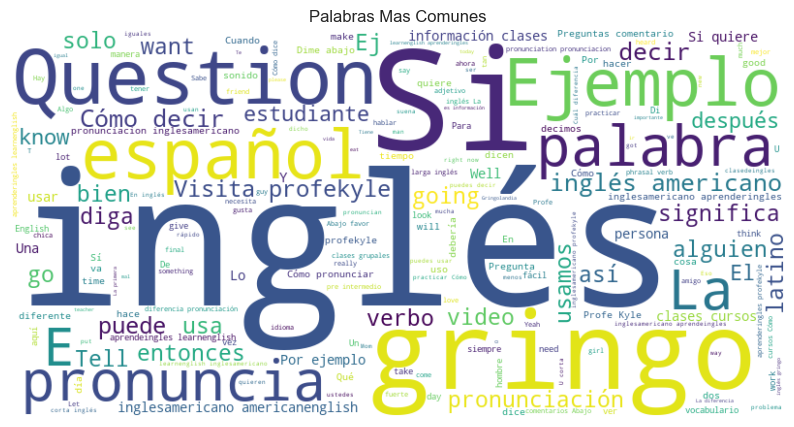

In [56]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_tokens))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras Mas Comunes')
plt.show()

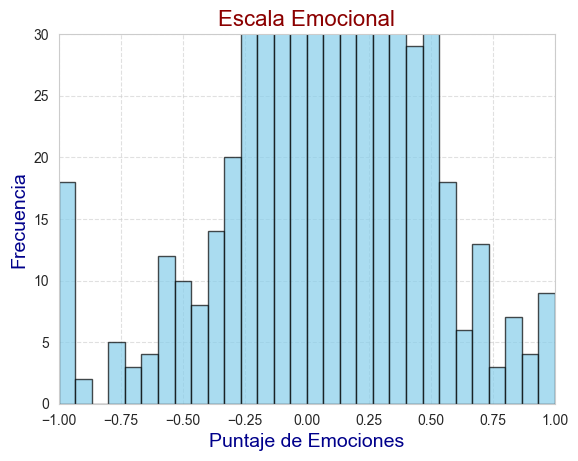

In [57]:
sns.set_style('whitegrid')
df_emotions['Sentiment_Score'] = df_emotions['caption'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.hist(df_emotions['Sentiment_Score'], bins = 30, edgecolor = 'black', color = 'skyblue', alpha = 0.7)
plt.xlabel('Puntaje de Emociones', fontsize = 14, color = 'darkblue')
plt.ylabel('Frecuencia', fontsize = 14, color = 'darkblue')
plt.title('Escala Emocional', fontsize=16, color='darkred')

plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(-1, 1)
plt.ylim(0, 30)
plt.show()

#-1 representa un sentimiento muy negativo.
#0 representa un sentimiento neutral.
#1 representa un sentimiento muy positivo.

In [60]:
df_emotions.to_csv("df_emotions_caption_profekyle.csv", index=False, header=True)

In [61]:
df_emotions.sort_values("Sentiment_Score", ascending=False).head(10)

,id,caption,timestamp,type,productType,firstComment,likesCount,commentsCount,videoPlayCount,videoViewCount,videoDuration,tokens,Sentiment_Score
1453,1672787117057923088,"Un dicho gringo que de verdad usamos. Cuando olvidamos lo que queremos decir, decimos esto. \nPor ejemplo: Oh, what is it called again??? It's on the tip of my tongue... Oh, yeah!!! The sauce is called molé. It's delicious.",2017-12-18 21:19:22,Video,feed,NaN,299,13,0,0,59.533,"[Un, dicho, gringo, verdad, usamos, ., Cuando, olvidamos, queremos, decir, ,, decimos, ., Por, ejemplo, :, Oh, ,, what, is, it, called, again, ?, ?, ?, It's, on, the, tip, of, my, tongue, ..., Oh, ,, yeah, !, !, !, The, sauce, is, called, molé, ., It's, delicious, .]",1.0
780,2434694494439280749,Cómo pronunciar GOOD y WOOD\n.\n1. Ambos tienen la vocal de chimpanze macho alfa enojado (como alguien te da un golpe en el plexo solar).\n.\n2. W se pronuncia suavemente. Como una U pero usas los labios empujándolos hacia afuera para crear una consonante. ¡No se pronuncia como GUA!\n.\n3. G se pronuncia como una G de español.\n.\nPD: WOULD y WOOD son sinónimos.\n.\nA practicar!,2020-11-04 02:51:43,Video,feed,Sería interesante un wood vs would☺️.,313,11,0,3838,51.800,"[Cómo, pronunciar, GOOD, WOOD, ., 1, ., Ambos, vocal, chimpanze, macho, alfa, enojado, (, alguien, da, golpe, plexo, solar, ), .\n., 2, ., W, pronuncia, suavemente, ., Como, U, usas, labios, empujándolos, hacia, afuera, crear, consonante, ., ¡, No, pronuncia, GUA, !, ., 3, ., G, pronuncia, G, español, .\n., PD, :, WOULD, WOOD, sinónimos, .\n., A, practicar, !]",1.0
814,2417207914183099729,"¿Quieres un gringuismo que sorprenderá a los gringos?\n.\nTe preguntan el mejor lugar para comer tal plato famoso de tu país y vas a decirles, ""Your best bet is Doña Florinda's restaurant in the Revolution neighborhood.""\n.\nSus caras harán esto .\n.\nBEST BET es nuestra forma de decir BEST OPTION.\n.\nWhere is my best bet to dance salsa all night?\n.\nTell me below.",2020-10-10 23:49:14,Video,feed,NaN,394,21,0,3553,59.300,"[¿, Quieres, gringuismo, sorprenderá, gringos, ?, ., Te, preguntan, mejor, lugar, comer, tal, plato, famoso, país, vas, decirles, ,, "", Your, best, bet, is, Doña, Florinda's, restaurant, in, the, Revolution, neighborhood, ., "", ., Sus, caras, harán, .\n., BEST, BET, forma, decir, BEST, OPTION, .\n., Where, is, my, best, bet, to, dance, salsa, all, night, ?, ., Tell, below, .]",1.0
1390,1720819912644296399,"I found my best ""STUD"" photo. \nLadies... control yourself.",2018-02-23 03:49:00,Image,0,‍♀️,885,87,0,0,0.000,"[I, found, my, best, "", STUD, "", photo, ., Ladies, ..., control, yourself, .]",1.0
666,2566491221885469398,"‍♀️‍♀️‍♀️Si eres una latina que habla con gringos a menudo, es probable que algún gringo te haya llamado SASSY.\n.\nSASSY es un adjetivo que usamos para describir esa actitúd de ""no me importa quién eres, respeto mi misma, sé mi valor y no voy a dejarte tratarme como una niña boba"".\n.\nEs un cumplido aunque puede ser irritante dependiendo del contexto y el hombre que te lo dice \n.\nEj: -Hey there, beautiful.\n-Do I know you?\n-No, but you should.\n-I need to go. \n-Whoah, so sassy!\n.\nAre you sassy? \n.\nVisita profekyle.com para más información sobre mis clases y cursos.",2021-05-04 23:08:34,Video,feed,"@profekyle teacher which one is ok, how many are you? Or how many of you are there? ....thank u very much for sharing your knowledge ¡¡¡¡",286,11,0,2745,59.766,"[‍, ♀, ️‍♀, ️‍♀, ️Si, latina, habla, gringos, menudo, ,, probable, algún, gringo, llamado, SASSY, .\n., SASSY, adjetivo, usamos, describir, actitúd, "", importa, quién, ,, respeto, misma, ,, sé, valor, voy, dejarte, tratarme, niña, boba, "", .\n., Es, cumplido, aunque, puede, ser, irritante, dependiendo, contexto, hombre, dice, ., Ej, :, -, Hey, there, ,, beautiful, ., -, Do, I, know, you, ?, -, No, ,, but, you, should, ., -, I, need, to, go, ., -, Whoah, ,, so, sassy, !, ., Are, you, sassy, ?, ., Visita, profekyle.com, información, clases